Text(0, 0.5, 'Count')

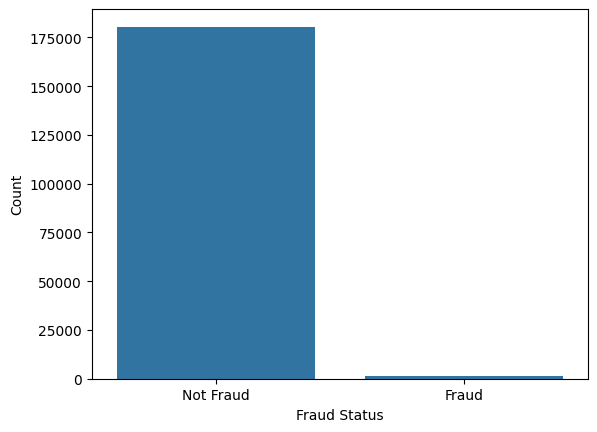

In [8]:
# import necessary libraries 
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt 
# %matplotlib inline
import seaborn as sns

# import dataset
creditcard_file = pd.ExcelFile("data_UPDATED.csv.xlsx")
trainData = pd.read_excel(creditcard_file, "train")

# Explore the dataset 
sns.countplot(x="isFraud", data=trainData)
plt.xticks([0,1], labels=["Not Fraud", "Fraud"])
plt.xlabel("Fraud Status")
plt.ylabel("Count")
# sns.countplot(x="isFraud", hue="category", data=trainData)
# sns.countplot(x="isFraud", hue="state", data=trainData)

# plt.hist(trainData["amount"])

In [ ]:
sns.countplot(x="isFraud", hue="gender", data=trainData)
plt.xticks([0,1], labels=["Not Fraud", "Fraud"])
plt.xlabel("Fraud Status")
plt.ylabel("Count")

# in the bigger scale of things, more females had a history of no fraud than males 

In [ ]:
# sns.countplot(x="isFraud", hue="gender", data=trainData)

fraud_data = trainData[trainData["isFraud"] == 1]
sns.countplot(x="gender", hue = "gender", data = fraud_data)
plt.xlabel("Gender of those who committed fraud")
plt.ylabel("Number of frauds")
plt.figure(figsize=(4,5))
plt.show()

# however when comparing the number of frauds committed by each gender, females had a slightly higher count of frauds than males 
# but they were almost equally likely to commit fraud

In [ ]:
sns.countplot(x="category", hue="category", data=fraud_data)
plt.xticks(rotation=40)
plt.tight_layout()
plt.figure(figsize=(4,6))
plt.show()

# people were more likely to commit fraud by shopping on the internet, the second highest being grocery pos
# This correlates with the fact that more women are likely to commit fraud (with the way gender roles are in our society?) 

In [ ]:
# sns.countplot(x="isFraud", hue="category", data=fraud_data)

# graph of highest appearing names in fraud data set 
# concatenate first and last names 
name_counts = fraud_data["firstName"].value_counts()
fraud_data["fullName"] = fraud_data["firstName"] + " " + fraud_data["lastName"]
name_counts = fraud_data["fullName"].value_counts()
top_names = name_counts.head(15)
plt.figure(figsize=(10,5))
sns.barplot(x=top_names.index, y=top_names.values)
plt.xlabel('Name')
plt.ylabel('Count')
plt.title("Top 15 Names in Fraud Data")
plt.xticks(rotation = 40)
plt.show()

In [ ]:
#graph age groups of individuals who committed fraud 
import pandas as pd

trainData["dateOfBirth"] = pd.to_datetime(trainData["dateOfBirth"])
current_date = pd.to_datetime("2024-04-06")
trainData["age"] = (current_date - trainData["dateOfBirth"]).astype('<m8[Y]')

#Age groups 
age_bins = [0,18,30,40,50,60,70]
age_labels = ["under 18", "18-29", "30-39", "40-49", "50-59", "60-70"]
trainData["ageGroup"] = pd.cut(trainData["age"], bins = age_bins, labels = age_labels, right = False)

fraud_data = trainData[trainData["isFraud"] == 1]

plt.figure(figsize=(10,6))
sns.countplot(x="ageGroup", data = fraud_data, order=age_labels)
plt.show()


In [ ]:
# check to see if the data contains any missing values 
trainData.isnull().sum()
# data does not contain any missing values and does not need to be cleaned

In [11]:
# graphing creditCard amount

data = pd.ExcelFile('data_UPDATED.csv.xlsx')
data = pd.read_excel(data, 'train')
bins = np.arange(0, data['amount'].max() + 50, 50)
labels = [f"{i}-{i+49}" for i in range(0, int(data['amount']).max() + 1, 50)]

# Create a new column with the category labels
data['amount_category'] = pd.cut(data['amount'], bins=bins, labels=labels, include_lowest=True)

# Group the data by amount category and count the number of fraud transactions
fraud_counts = data[data['isFraud'] == 1].groupby('amount_category').size()

# Plot the graph
plt.figure(figsize=(10, 6))
plt.bar(fraud_counts.index, fraud_counts.values)
plt.xlabel('Amount Category')
plt.ylabel('Number of Fraud Transactions')
plt.title('Fraud Transactions by Amount Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()





TypeError: 'numpy.float64' object cannot be interpreted as an integer